✅ Dataset Loaded Successfully!
Shape: (11162, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

🎯 Target Column Detected: deposit

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays    

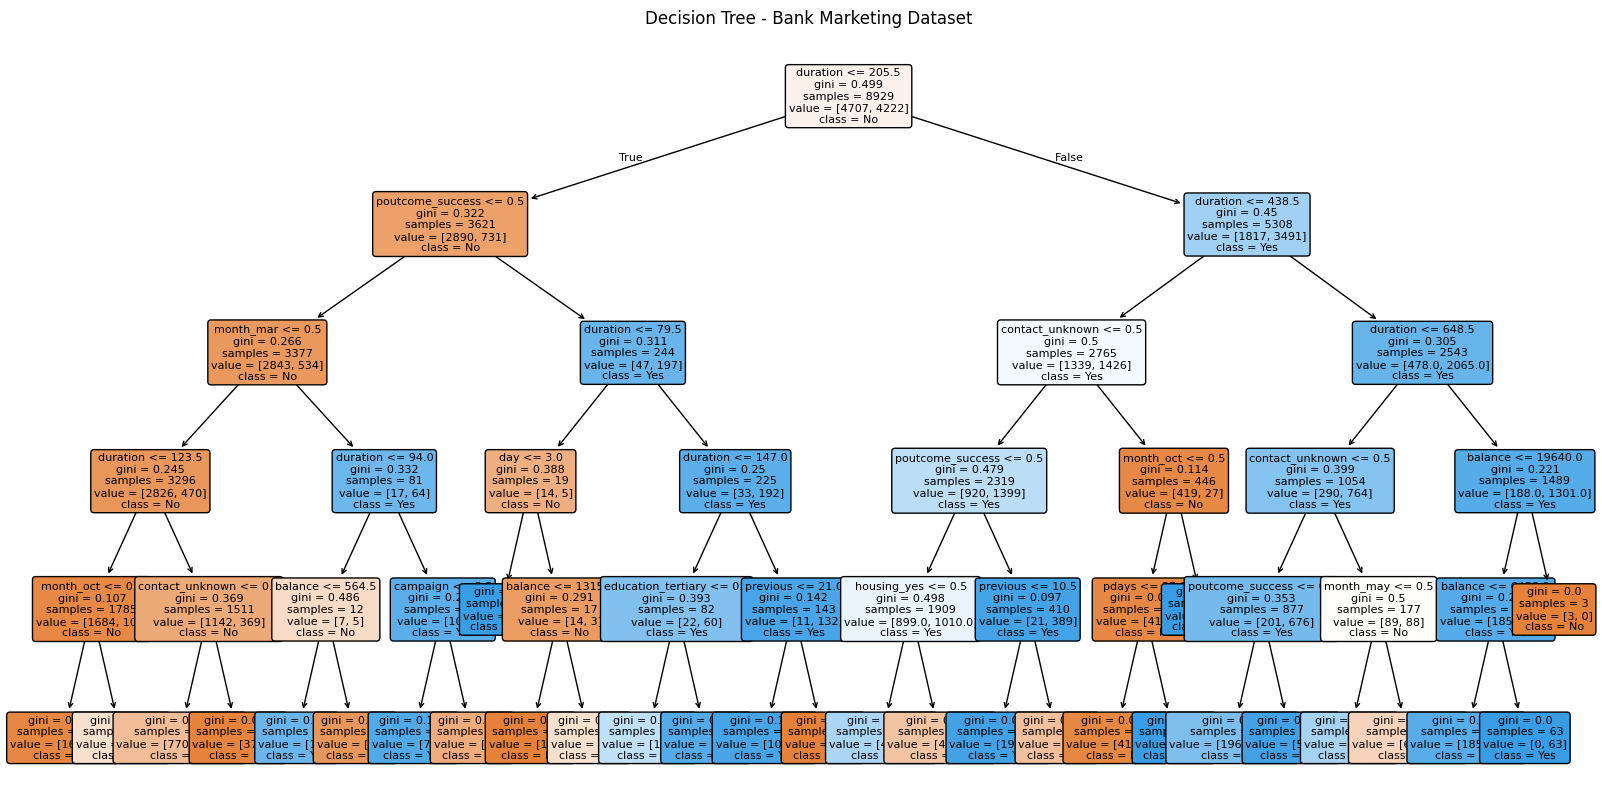

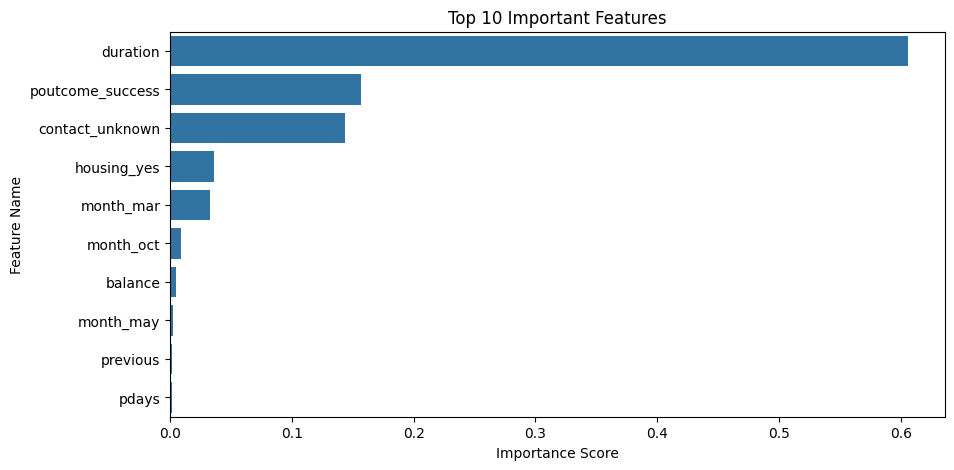


✅ Model Saved as 'bank_marketing_decision_tree.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==============================================
# 🏦 BANK MARKETING DECISION TREE CLASSIFIER (Final Working Version)
# ==============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step 2: Load Dataset (Working Link)
url = "https://raw.githubusercontent.com/ashutoshmakone/Bank-Marketing-Dataset-Machine-Learning/main/bank.csv"
df = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

# Step 3: Identify Target Column
# The target column might be named 'y' or 'deposit' in different versions.
if 'y' in df.columns:
    target_col = 'y'
elif 'deposit' in df.columns:
    target_col = 'deposit'
else:
    raise ValueError("❌ Target column not found! Please check dataset columns.")

print(f"\n🎯 Target Column Detected: {target_col}")

# Step 4: Basic Info
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Value Counts ---")
print(df[target_col].value_counts())

# Step 5: One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)
print("\n✅ One-Hot Encoding Completed! New Shape:", df_encoded.shape)

# Step 6: Split Features and Target
target_column_name = [col for col in df_encoded.columns if target_col in col.lower()][0]
X = df_encoded.drop(target_column_name, axis=1)
y = df_encoded[target_column_name]

# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

# Step 8: Train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("\n✅ Model Training Completed!")

# Step 9: Model Evaluation
y_pred = model.predict(X_test)

print("\n--- MODEL EVALUATION ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=8)
plt.title("Decision Tree - Bank Marketing Dataset")
plt.show()

# Step 11: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

# Step 12: Save Model
joblib.dump(model, 'bank_marketing_decision_tree.pkl')
print("\n✅ Model Saved as 'bank_marketing_decision_tree.pkl'")

# Step 13: Download Model (Optional)
from google.colab import files
files.download('bank_marketing_decision_tree.pkl')

